# Truncated mass distribution collapse simulation


In this notebook we're going to simulate the collapse of a truncated sphere mass distribution. We're going to infer how the masses collapse in the $T_{dyn}$ (dynamical time) and if they expand in the outer space without crushing on one another. In this case we will work on a $\textit{Keplerian potential}$ in an homogeneous sphere that's truncated at a given radius $a$.

## Basics on this type of system 

<img src="trunc_sphere.png" align="right" width="400px"/>


The $\rho_0$ density parameter is defined as constant inside the sphere, while it's null elsewhere. 
Thus, the following relationships hold: 

$$M(R)=\frac{4 \pi}{3} \rho_0 R^{3}$$

$$v(R)=\sqrt{\frac{4 \pi G}{3} \rho_0} R$$

$$T_{orbital}=\frac{2 \pi R}{v(R)} =  \sqrt{\frac{3 \pi}{G \rho_{0}}}$$


We can define the $\textbf{dynamical time}$ making us of the following relation: 

$$\frac{d^{2}r}{dt^{2}}=-\frac{GM(r)}{r^2} = - \frac{4\pi G \rho_0 r}{3}$$

We see that the period of this oscillator is $1/4$ the orbital one. The result is the dynamical time: 

$$T_{dynam} = \sqrt{\frac{3 \pi}{16 G \rho_0}}$$

The system stability is tested over multple dynamical times, for instance $20 \cdot T_{dynam}$. If we integrate the above differential equation from $R \to 0$ we obtain the $\textbf{collapse time}$. Skipping all the passages to get here: 

$$T_{coll} = \sqrt{\frac{3 \pi}{32 G \rho_0}} = \frac{T_{dynam}}{\sqrt{2}}$$

What are the implications of a spherical distribution such as the one described above in real life? Such a system, if real, would collapse to the center due to its own gravity and produce a supermassive black hole. This does not happen due to some discrepancies with the theory: 

- 1) Are we really sure that the system is $\textit{actually}$ homogeneous and isotropic?
- 2) At some point the Newtonian dynamics won't work anymore; 
- 3) We only have finite $Ns$ of particles, not $\infty$. These particles can change their energy drastically due to transfer from system and other particles. The total energy is conserved, some particles become more bound and some are ejected even if their energy was initially negative. 

This summarizes well what we're (hopefully!) going to investigate in the following lines. 

## Structure of the analysis

We followed these steps: 

- We generated the correct distribution for a finite N  of masses; 
- We produced the input file for the simulation; 
- We simulated the N-body problem; 
- We worked and analyzed the results. 

### 1) Generate the correct distribution

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=False)
%config InlineBackend.figure_format='retina'

from scipy.stats import uniform

/opt/anaconda3/lib/python3.9/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


We set the values for the constants we need for the problem...

In [16]:
N = 1000
M = 1 # * N
m = M / N
a = 1

... and generate the masses of the truncated sphere: 

In [17]:
cdf_r = uniform.rvs(0, 1, size=N)  # cumulative function of rs
rays = a * (cdf_r)**(1/3)

cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas
thetas = np.arccos(1 - 2 * cdf_theta)

phis = uniform.rvs(0, 2 * np.pi, size=N) 

Convert to $\textbf{cartesian}$ coordinates...

In [18]:
x = rays * np.sin(thetas) * np.cos(phis)
y = rays * np.sin(thetas) * np.sin(phis)
z = rays * np.cos(thetas) 

... and check the generated distribution with the 3D plot: 

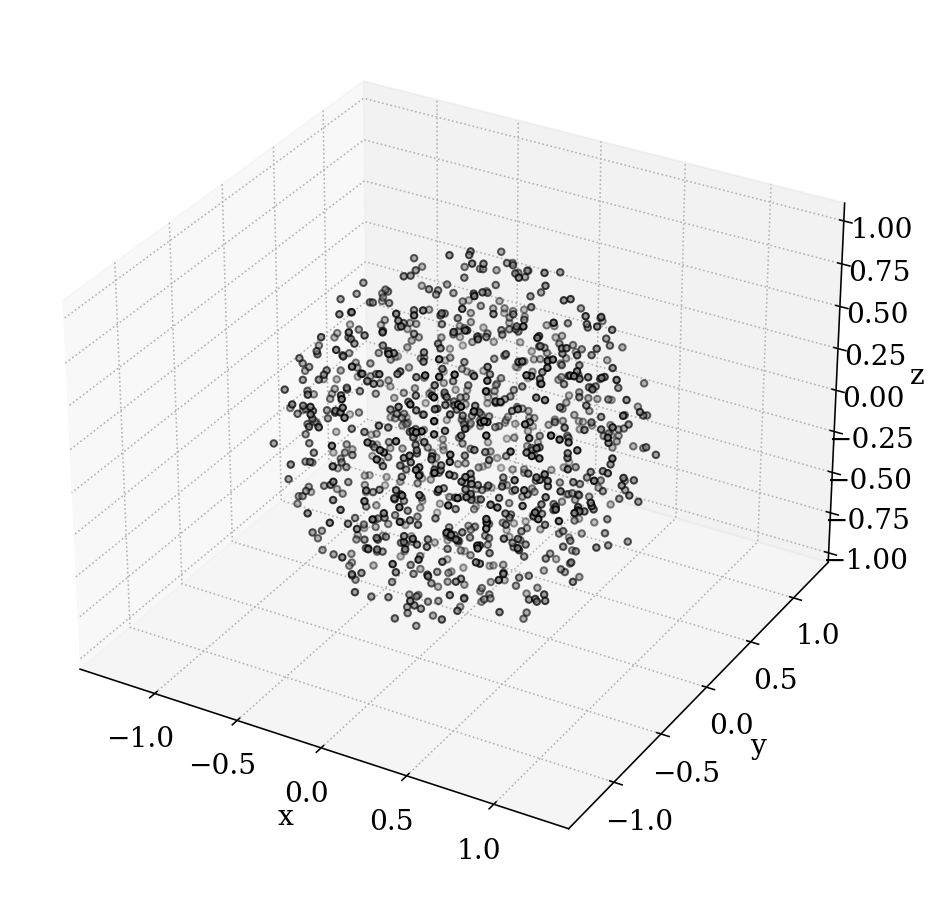

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c = 'grey', s=10.5, edgecolors='black')
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show();

### Check whether the coordinates distributions are correct

We first need to understand the shape of each $p(r)$, $p(\theta)$, $p(\psi)$ and then see if the normalized histogram of generated data confirms such distributions. 

Briefly: 

- R case: 

$$p(r) = \frac{3 r^{2}}{a^{3}}$$

- $\Theta$ case: 

$$p(\Theta) = \frac{sin(\theta)}{2}$$

- $\psi$ case: 

$$p(\psi) = \frac{1}{2 \pi}$$


All of the above have been evaluated to be normalized over the interval chosen for each parameter. 

In [20]:
V_sphere = 4 * np.pi / 3 * a**3

def analytic_distr_R(N, a):
    
    rs = np.linspace(0, a, N)
    
    return rs, 3 * rs**2 / a**3  # knowing that p(r) = 3 * rs**2 / a**3

def analytic_distr_theta(N, a):
    
    thetas = np.linspace(0, np.pi, N)
    
    return thetas, np.sin(thetas) / 2

def analytic_distr_phi(N, a):
    
    phis = np.linspace(0, 2 * np.pi, N)
    
    distr = [1 / (2 * np.pi - 0)] * N  # already normalized
    
    return phis, distr

### a) R plot

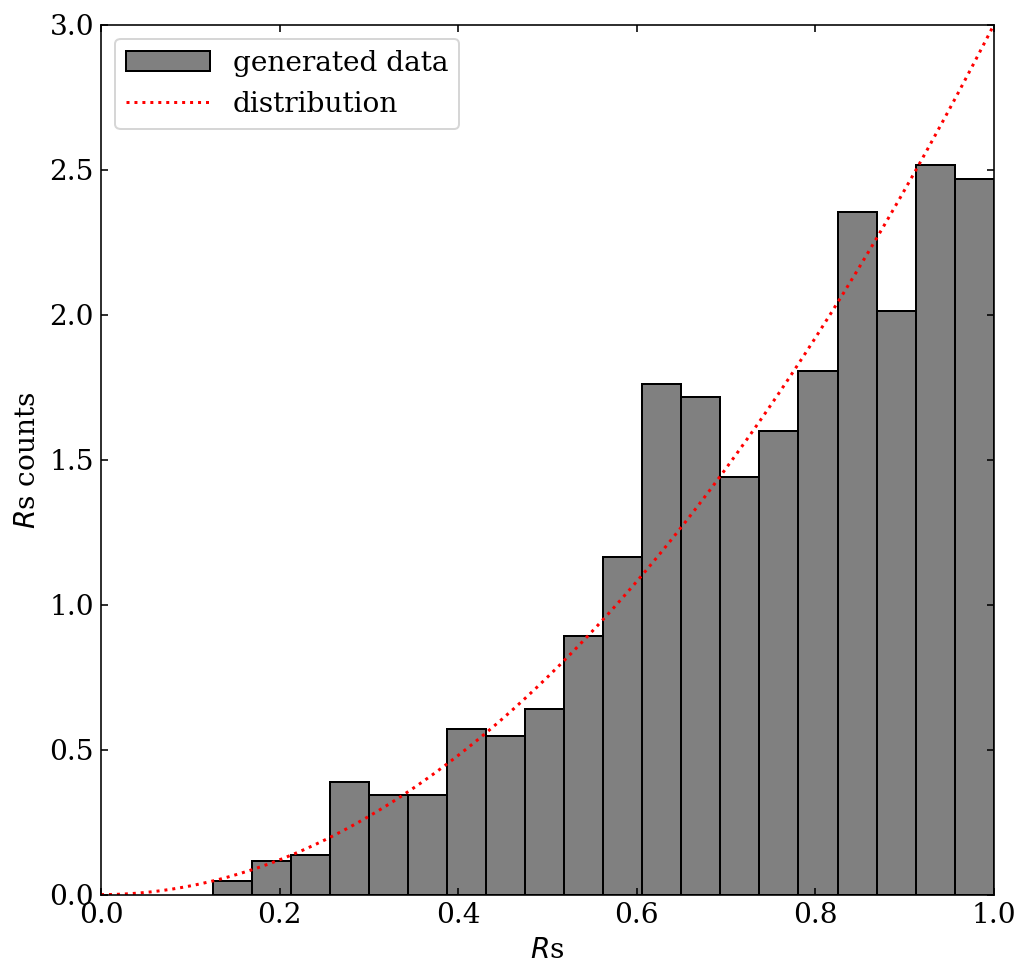

In [21]:
plt.figure(figsize = (8,8))

plt.hist(rays, 20, density=True, label="generated data", color='grey')
plt.plot(analytic_distr_R(N, a)[0], analytic_distr_R(N, a)[1], c='red', ls=':', label="distribution")
plt.xlabel("$R$s")
plt.ylabel("$R$s counts")
plt.legend()
plt.show()

### b) $\Theta$ plot

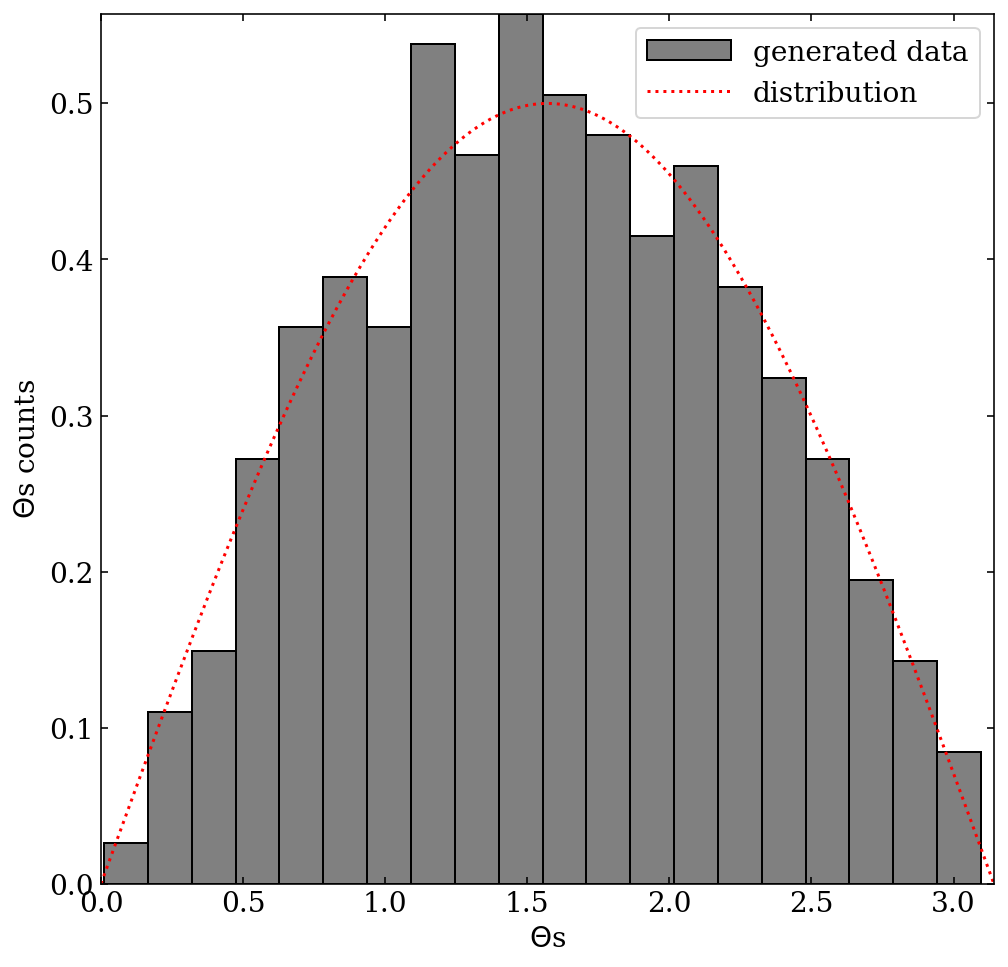

In [22]:
plt.figure(figsize = (8,8))

plt.hist(thetas, 20, density=True, label="generated data", color='grey')
plt.plot(analytic_distr_theta(N, a)[0], analytic_distr_theta(N, a)[1], c='red', ls=':', label="distribution")

plt.xlabel("$\Theta$s")
plt.ylabel("$\Theta$s counts")
plt.legend()

plt.show()

### c) $\Psi$ plot

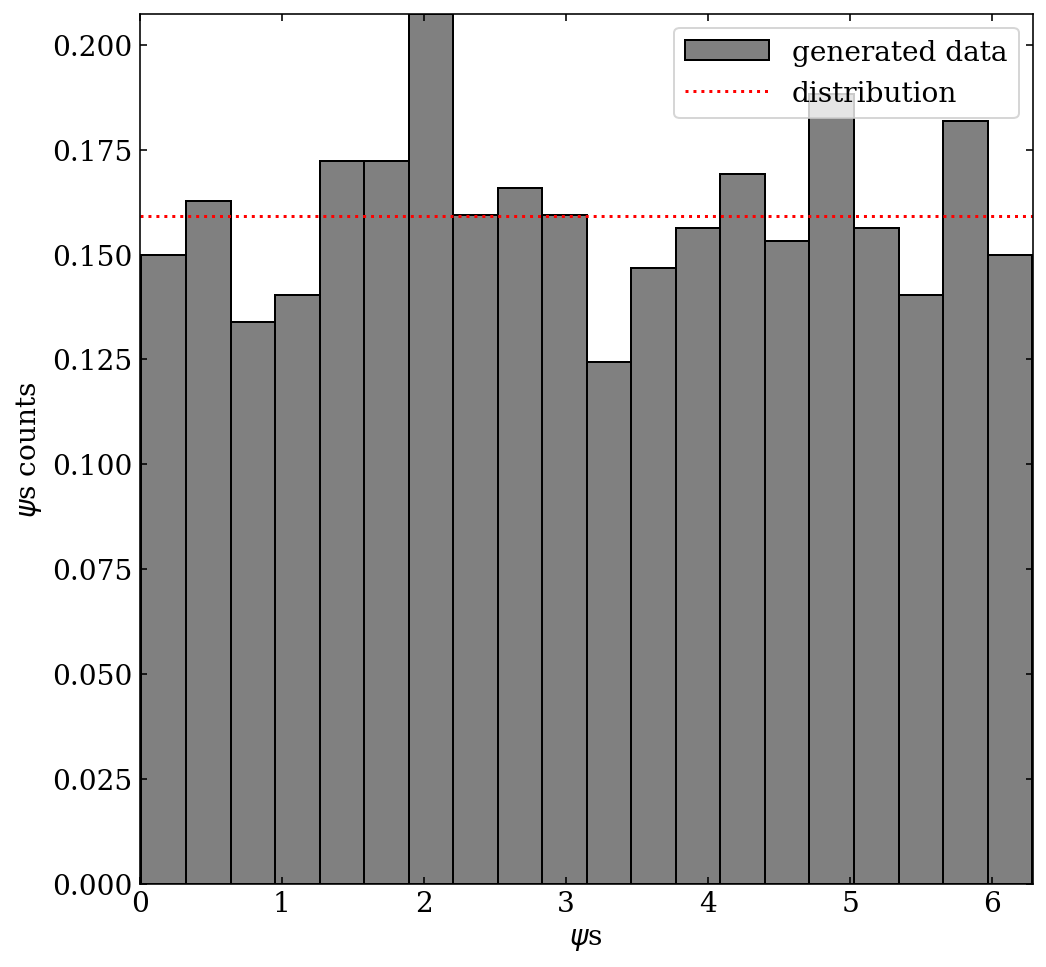

In [23]:
plt.figure(figsize = (8,8))

plt.hist(phis, 20, density=True, label="generated data", color='grey')
plt.plot(analytic_distr_phi(N, a)[0], analytic_distr_phi(N, a)[1], c='red', ls=':', label="distribution")


plt.xlabel("$\psi$s")
plt.ylabel("$\psi$s counts")
plt.legend()
plt.show()

With just $100$ masses it's not entirely visible but if we change the number to $1000$ or more the distributions are correct. 

### 2) Produce the initial conditions file

Run only if you need to change any condition on the previouse version of the initial file. 

In [10]:
# open the file
#file = open('homogeneous_sphere_initial.txt', 'w')

# write the file
#file.write(f'{N}\n')
#file.write('0\n')
#for i in range(N):
#    file.write(f'{m} {x[i]} {y[i]} {z[i]} {0} {0} {0}\n')

# close the file
#file.close()

We set some easy functions to extract the dynamical and collapse time. 

In [24]:
def dyn_time(rho_0): 
    
    G = 1
    
    return np.sqrt(3 * np.pi / (16 * G * rho_0)) 

def coll_time(rho_0): 
    
    G = 1
    
    return np.sqrt(3 * np.pi / (32 * G * rho_0))

In [25]:
rho0 = M / V_sphere # N * 1 masses of stars
print("density in the sphere", rho0)

density in the sphere 0.23873241463784303


Printing then both of them (it totally makes sense to do so, in order to establish the duration of the simulation):

In [26]:
print("The dynamical time is: ", dyn_time(rho0))
print("The collapse time is: ", coll_time(rho0))

The dynamical time is:  1.5707963267948963
The collapse time is:  1.1107207345395915
